In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from param.ipython import red
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

In [2]:
data = load_iris()

In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
X = data['data']
columns = list(data.feature_names)
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
Y = data['target']
labels = list(data.target_names)
print(labels)

['setosa', 'versicolor', 'virginica']


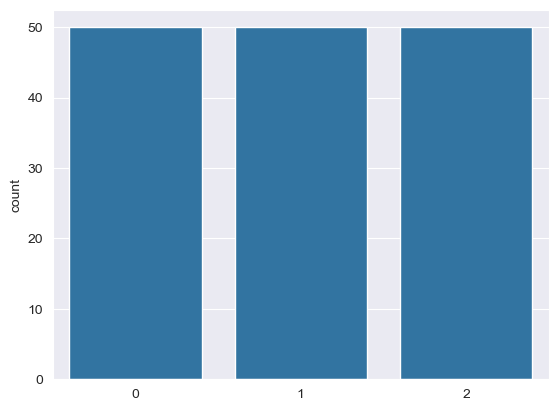

In [10]:
ser = pd.Series(Y)
table = ser.value_counts()
sns.barplot(table)
plt.show()

array([[<Axes: xlabel='Sepal_L', ylabel='Sepal_L'>,
        <Axes: xlabel='Sepal_W', ylabel='Sepal_L'>,
        <Axes: xlabel='Petal_L', ylabel='Sepal_L'>,
        <Axes: xlabel='Petal_W', ylabel='Sepal_L'>],
       [<Axes: xlabel='Sepal_L', ylabel='Sepal_W'>,
        <Axes: xlabel='Sepal_W', ylabel='Sepal_W'>,
        <Axes: xlabel='Petal_L', ylabel='Sepal_W'>,
        <Axes: xlabel='Petal_W', ylabel='Sepal_W'>],
       [<Axes: xlabel='Sepal_L', ylabel='Petal_L'>,
        <Axes: xlabel='Sepal_W', ylabel='Petal_L'>,
        <Axes: xlabel='Petal_L', ylabel='Petal_L'>,
        <Axes: xlabel='Petal_W', ylabel='Petal_L'>],
       [<Axes: xlabel='Sepal_L', ylabel='Petal_W'>,
        <Axes: xlabel='Sepal_W', ylabel='Petal_W'>,
        <Axes: xlabel='Petal_L', ylabel='Petal_W'>,
        <Axes: xlabel='Petal_W', ylabel='Petal_W'>]], dtype=object)

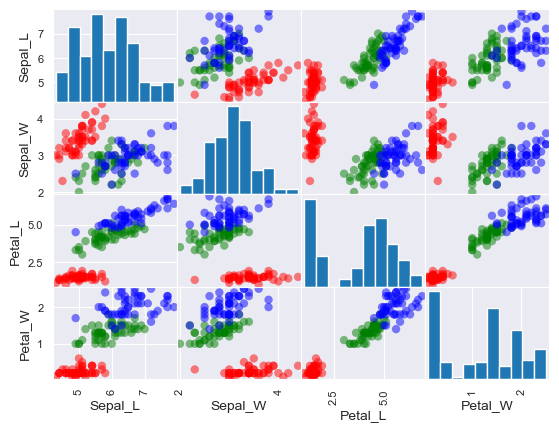

In [12]:
X_df = pd.DataFrame(X,columns = ['Sepal_L','Sepal_W','Petal_L','Petal_W'])
myColor = {0:'red',1:'green',2:'blue'}
myCol = pd.Series(Y).apply(lambda x: myColor[x])
pd.plotting.scatter_matrix(X_df,c=myCol,marker='o',alpha=0.5)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [16]:
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
Y_pred = GNB.predict(X_test)

In [17]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


In [21]:
accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(np.round(accuracy,3))

0.956


In [31]:
centers = GNB.theta_
variance = GNB.var_

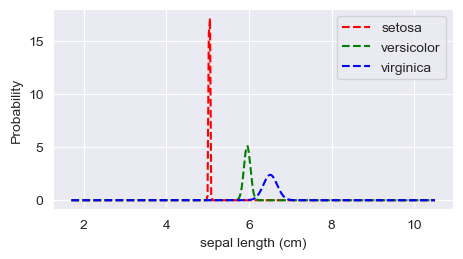

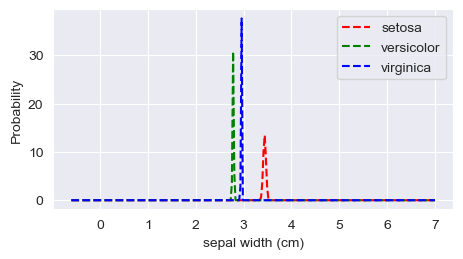

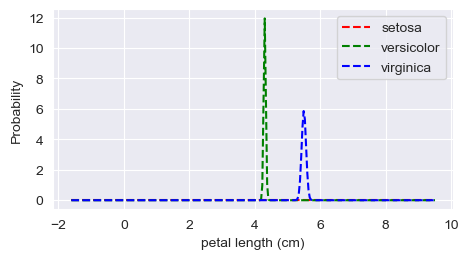

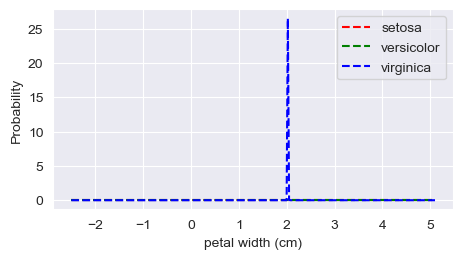

In [28]:
for i in range(4):
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = X.max() - X.min()
    x_grid = np.linspace(x_min-x_range/3, x_max+x_range/3, 300)
    fig = plt.figure(figsize = (4,2),dpi=100)
    ax = fig.add_axes([0,0,1,1])
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    for j in range(3):
        center = centers[j,i]
        sigma = np.square(variance[j,i])
        ax.plot(x_grid,st.norm.pdf(x_grid,loc=center,scale=sigma),color=myColor[j],linestyle='--',label = labels[j])
    ax.legend(loc=0)
    plt.show()

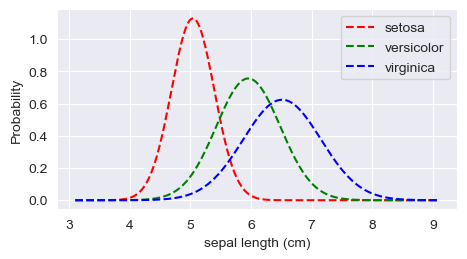

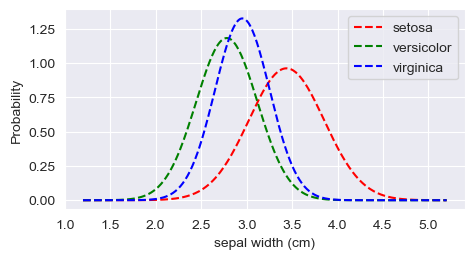

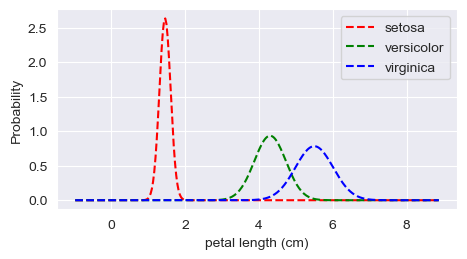

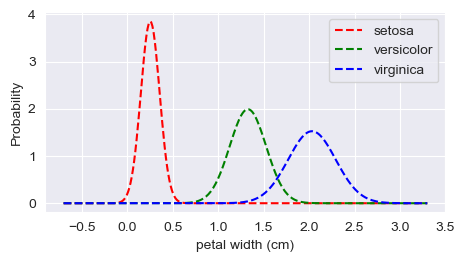

In [33]:
for i in range(4):
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = x_max-x_min
    x_grid = np.linspace(x_min-x_range/3,x_max+x_range/3,300)
    fig=plt.figure(figsize=(4,2), dpi=100) # Width, height and DPI setting.
    ax = fig.add_axes([0,0,1,1]) # Left, bottom, width, height.
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability')
    for j in range(3):
        center = centers[j,i]
        sigma = np.sqrt(variance[j,i])
        ax.plot(x_grid, st.norm.pdf(x_grid,loc=center,scale=sigma),color=myColor[j],linestyle="--",label=labels[j])
    ax.legend(loc=0)
    plt.show()